# GC Data Collection and Elaboration

## Packages description
1. **os**: This package provides a way to interact with the operating system. It allows you to perform various operating system-related tasks such as file and directory manipulation, environment variables access, and process management.
2. **pandas**: This package provides high-performance data structures and data analysis tools. It is widely used for data manipulation, analysis, and cleaning tasks. Pandas introduces two main data structures: Series (1-dimensional) and DataFrame (2-dimensional), which allow you to work with structured data easily.
3. **numpy**: This package is a fundamental library for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently.
4. **datetime**: This package supplies classes for manipulating dates and times. It allows you to create, manipulate, format, and perform calculations with dates and times.
5. **re**: This package provides regular expression matching operations. It enables you to search, match, and manipulate strings using patterns defined with regular expressions.
6. **glob**: This package provides a method to retrieve files/pathnames that match specified patterns. It allows you to search for files based on specific criteria, such as file extensions or patterns in their names.
7. **matplotlib.pyplot**: This package is a plotting library used for creating static, animated, and interactive visualizations in Python. It provides a MATLAB-like interface for generating various types of plots and charts.
8. **matplotlib.patche**: This package contains classes for creating and manipulating graphical patches, such as rectangles, circles, polygons, and more. These patches can be used in conjunction with the matplotlib.pyplot package to enhance visualizations.
9. **shutil**: This package provides a high-level interface for file and directory operations. It simplifies tasks like copying, moving, renaming, and deleting files and directories.
10. **tkinter**: This package is the standard Python interface to the Tk GUI toolkit. It provides classes and functions for creating graphical user interfaces (GUIs) and allows you to build windows, dialogs, buttons, and other GUI elements for your applications.
11. **tkinter.filedialog**: This submodule provides a set of dialogs for file and directory selection. It allows you to display dialog windows that enable users to browse and select files or directories from their system.

**Pre-built in Python:**

- os
- datetime
- shutil
- re


**Packages that need to be installed:**

- pandas: pip install pandas
- numpy: pip install numpy
- glob: pip install glob2
- matplotlib: pip install matplotlib
- tkinter: pip install tk

In [1]:
import os
import pandas as pd
import numpy as np
import datetime
import re
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import shutil
import tkinter as tk
from tkinter import filedialog

In [2]:
#Defining the JM colours
JM_colours = {
    'dark blue':(30/235,34/235,170/235), 
    'cyan':(0,172/235,233/235), 
    'teal':(157/235,211/235,203/235), 
    'pink':(229/235,0,118/235), 
    'grey':(87/235,87/235,86/235), 
    'light grey':(227/235,227/235,227/235), 
    'purple':(110/235,54/235,140/235), 
    'magenta':(229/235,0/235,118/235)
}

## File selection
The following code provides a convenient way for the user to select a folder interactively using a graphical user interface (GUI). The selected folder path can then be used in further processing or manipulation of files and directories within the chosen folder.

In [3]:
#Select the data folder

def select_folder():
    root = tk.Tk()
    root.withdraw()
    folder_path = filedialog.askdirectory()
    return folder_path

# Select the folder interactively
folder_path = select_folder()

**Breakdown of how it works**

1. The function `select_folder()` is defined. It does not take any arguments.
2. Inside the function, a new `Tk` object from the `tkinter` module is created, representing the main window of the GUI.
3. The `withdraw()` method is called on the Tk object to hide the main window. This is done to make the folder selection dialog the only visible part of the GUI.
4. The `askdirectory()` method is called on the `filedialog` submodule of `tkinter`. This method displays a dialog box that allows the user to select a folder interactively.
5. The selected folder path is stored in the `folder_path` variable.
6. Finally, the `folder_path` variable is returned by the `select_folder()` function.

## GSTAT Data visualisation
To check the operating Current Density ranges before giving the input. This code reads the `GSTAT.txt` file from the testing rig, performs data manipulation and creates a plot with two y-axes to visualise the relationship between "T(Seconds)", "E(V)", and "I(mAcm-2)" columns in the file.

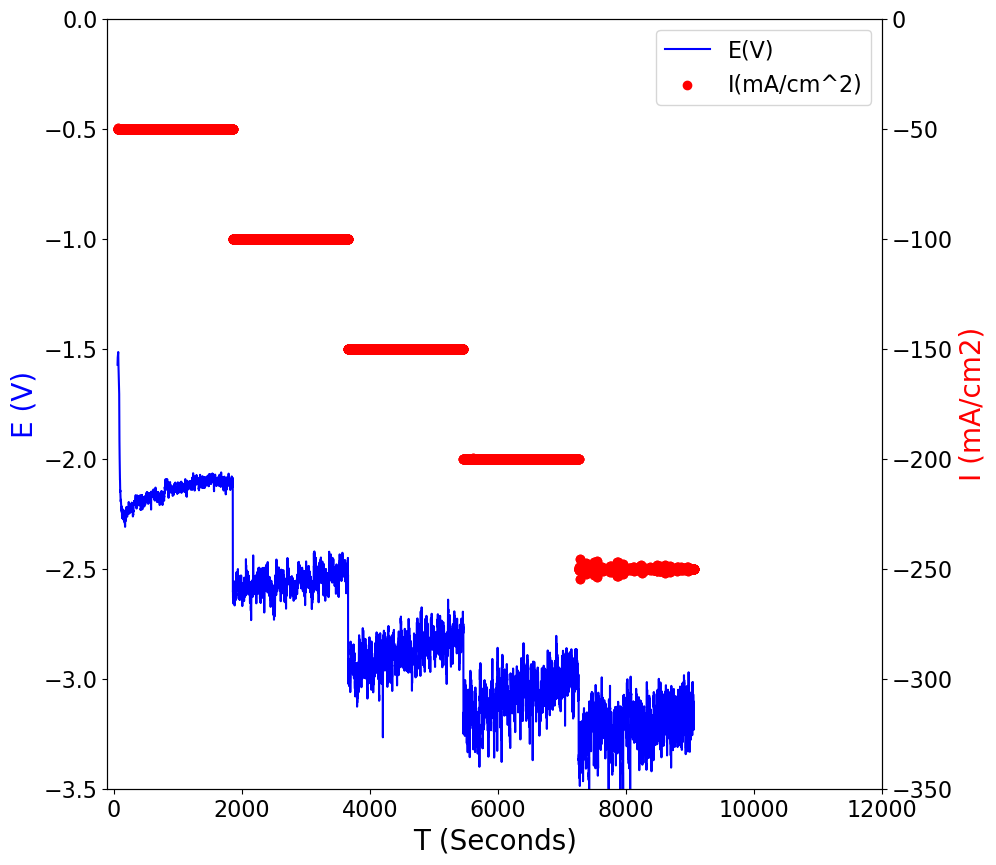

In [4]:
#Import the file
directory_path = folder_path
file_gstat = '/GSTAT_ALL.txt'
file_path = directory_path + file_gstat
gstat = pd.read_csv(file_path, delimiter='\t')

#Convert the Current 'I(A)' into 'I (mA/cm2)'
gstat['I(A/cm2)'] = gstat['I(A/cm2)'] * (1000 / 10)
gstat = gstat.rename(columns={'I(A/cm2)': 'I(mA/cm2)'})

#Extract the columns for the plot
x = gstat['T(Seconds)']
y1 = gstat['E(V)']
y2 = gstat['I(mA/cm2)']

#Create the figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 10))

#Plot the first y-axis (E(V))
line1 = ax1.plot(x, y1, color='blue', label='E(V)')
ax1.set_xlabel('T (Seconds)', fontsize=20)
ax1.set_ylabel('E (V)', color='blue', fontsize=20)
ax1.set_ylim(-3.5, 0)
ax1.set_xlim(-100, 12000)
ax1.tick_params(axis='both', labelsize=16)

#Create a second y-axis
ax2 = ax1.twinx()

#Plot the second y-axis (I(mA/cm^2))
line2 = ax2.scatter(x, y2, color='red', label='I(mA/cm^2)')
ax2.scatter(x, y2, color='red')
ax2.set_ylabel('I (mA/cm2)', color='red', fontsize=20)
ax2.set_ylim(-350, 0)
ax2.tick_params(axis='both', labelsize=16)

#Set the legend
lines = line1 + [line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='best', fontsize=16)

#Display the plot
plt.show()

**Breakdown of how it works**

1. **Import the file**: It assumes that the variable `folder_path` contains the path to a directory, and it appends the filename `'/GSTAT_ALL.txt'` to that path to create the `file_path`. Then, it uses `pd.read_csv()` from the `pandas` library to read the CSV file located at file_path into a DataFrame named gstat. The delimiter `'\t'` is used to indicate that the file is tab-separated.
2. **Convert the Current 'I(A)' into 'I (mA/cm2)'**: It multiplies the values in the `'I(A/cm2)'` column of the `gstat` DataFrame by a conversion factor of (1000 / 10) to convert the current units from Amperes per square centimeter to milliamperes per square centimeter. It then renames the 'I(A/cm2)' column to 'I(mA/cm2)'.
3. **Extract the columns for the plot**: It extracts the 'T(Seconds)', 'E(V)', and 'I(mA/cm2)' columns from the gstat DataFrame and assigns them to the variables `x`, `y1`, and `y2`, respectively.
4. **Create the figure and axis objects**: It creates a figure and a set of axes using `plt.subplots()` from the `matplotlib.pyplot` library. The figsize parameter is set to `(10, 10)` to define the size of the figure.
5. **Plot the first y-axis (E(V))**: It plots a line graph of `x` (T(Seconds)) on the x-axis and `y1` (E(V)) on the y-axis using `ax1.plot()`. It customizes the x-axis label, y-axis label, y-axis limits, and tick parameters for the primary y-axis.
6. **Create a second y-axis**: It creates a twin y-axis using `ax1.twinx()` to allow for plotting multiple y-axes on the same plot.
7. **Plot the second y-axis (I(mA/cm^2))**: It plots a scatter plot of `x` (T(Seconds)) on the x-axis and `y2` (I(mA/cm^2)) on the secondary y-axis using `ax2.scatter()`. It customizes the y-axis label, y-axis limits, and tick parameters for the secondary y-axis.
8. **Set the legend**: It sets the legend for the plot by combining the lines from the primary and secondary y-axes and the corresponding labels. The legend is positioned using `loc='best'` and customized with a specific font size.
9. **Display the plot**: It uses `plt.show()` to display the plot on the screen.

## Input from the user
This code prompts the user to input values for the minimum current density, maximum current density, and step size, generates a list of current density values based on the user's input, and then prints the resulting list. The generated list contains a sequence of current density values based on the user-defined range and step size.

In [5]:
#Prompt the user for input
min_current_density = int(input("Enter the minimum current density: "))
max_current_density = int(input("Enter the maximum current density: "))
step_current_density = int(input("Enter the step size for current density: "))

#Generate the current density values based on user input
current_density_range = range(min_current_density, max_current_density-50, step_current_density)
Current_Density = [val for val in current_density_range for _ in range(2)]
#Current_Density = Current_Density.reverse()

#Print the Current_Density list
print("Current Density values:")
print(Current_Density)

Current Density values:
[-50, -50, -100, -100, -150, -150, -200, -200, -250, -250]


**Breakdown of how it works**

1. **Prompt the user for input**: It uses the `input()` function to interactively prompt the user to enter three integer values: the minimum current density, the maximum current density, and the step size for the current density. Each value is assigned to the corresponding variable: `min_current_density`, `max_current_density`, and `step_current_density`.
2. **Generate the current density values based on user input**: It creates a range of current density values using `range()`, starting from `min_current_density` and incrementing by `step_current_density` until `max_current_density-50` (excluding). Then, it generates a list named `Current_Density` by repeating each value in the range twice using a list comprehension and a dummy `_` variable.
3. **Print the Current_Density list**: It displays a message "Current Density values:" followed by the elements of the `Current_Density` list using the `print()` function.

This code defines calibration data for different gases and creates a DataFrame named calibration to store the calibration values. The resulting DataFrame has the calibration data arranged with gases as columns and different calibration parameters as rows.

In [6]:
#From CO2 calibration curve
value_a = -257051.28935
value_b = -4313.06376

#Gases calibration curves and DataFrame creation
data = {
    'n': [2, 2, 8, 12],
    #from calibration curve y = mx + c
    'c': [814.35, 152.05, 1.1672, 102.27], 
    'm': [12739.3671, 11343, 1590.4, 1843.5],
    #Faraday constant
    'F': [96485.3329, 96485.3329, 96485.3329, 96485.3329],
    #Molar volume
    'k': [24465.3953, 24465.3953, 24465.3953, 24465.3953]
}
calibration = pd.DataFrame(data, index=['H2', 'CO', 'CH4', 'C2H4'])
calibration = calibration.transpose()
calibration

,H2,CO,CH4,C2H4
n,2.0000,2.0000,8.0000,12.0000
c,814.3500,152.0500,1.1672,102.2700
m,12739.3671,11343.0000,1590.4000,1843.5000
F,96485.3329,96485.3329,96485.3329,96485.3329
k,24465.3953,24465.3953,24465.3953,24465.3953


## Import files
This code processes a set of XLS files in a selected folder, reads the data from each file into a DataFrame, rearranges and filters the data, and generates a pivot table based on the filtered data. It also handles non-numerical data and ensures proper ordering of columns in the pivot table.

In [7]:
# List all XLS files in the selected folder
files = os.listdir(folder_path)
files_xls = [f for f in files if f[-3:] == 'XLS']


#Set the file name pattern to sort the name through the code by date and time rather than sample number
pattern = r'\d{2}_\d{2}_\d{4}\s\d{2}_\d{2}_\d{2}'
filename_datetime_list = []
for filename in files_xls:
    match = re.search(pattern, filename)
    if match:
        datetime_str = match.group()
        datetime_obj = datetime.datetime.strptime(datetime_str, "%d_%m_%Y %H_%M_%S")
        filename_datetime_list.append((filename, datetime_obj))

# Sort the list of tuples based on the datetime object
sorted_filename_datetime_list = sorted(filename_datetime_list, key=lambda x: x[1])
sorted_filenames = [x[0] for x in sorted_filename_datetime_list]

#This part of the code creates a full DataFrame which contains all the data from every excel file by keeping 
#the data sorted by worksheet
dfs = []
for filename in sorted_filenames:
    dfname = pd.ExcelFile(os.path.join(folder_path, filename))
    for items in dfname.sheet_names:
        dfnew = pd.read_excel(dfname, sheet_name=items)
        dfnew['filename'] = filename  # add a new column to identify the source file
        dfs.append(dfnew)
data = pd.concat(dfs, ignore_index=True)

#This part of the script rearranges the data according to the filename and keeps only the information about the 
#second occurrance of Nitrogen, which is the one needed
a = ['Hydrogen', 'Carbon monoxide', 'Nitrogen', 'Methane', 'Ethylene']
data = data.groupby('filename',as_index=False, sort=False).apply(lambda x: x[x['Name'].isin(a)].drop_duplicates(subset='Name', keep='last'))
data = data[['Name', 'Area', 'filename']].reset_index(drop=True)

#Dealing with non-numerical data, such as N.D.=not detected from the instrument
data["Area"] = data["Area"].replace(["N.D."], 0)
data["Area"] = pd.to_numeric(data["Area"])

#Target table generation
pivot_table = data.pivot_table(index='filename', columns='Name', values='Area', sort=False)
column_order = ['Hydrogen', 'Carbon monoxide', 'Nitrogen', 'Methane',  'Ethylene']
pivot_table = pivot_table.reindex(columns=column_order)

**Breakdown of how it works**

1. **List all XLS files in the selected folder**: It uses `os.listdir()` to get a list of all files in the selected folder (`folder_path`). Then, it filters the list to only include files with a file extension of 'XLS'. The resulting list of XLS files is stored in the `files_xls` variable.
2. **Set the file name pattern to sort the name through the code by date and time**: It defines a regular expression pattern (`pattern`) to match the date and time format in the filenames. It then iterates over the `files_xls` list, searching for matches between the pattern and each filename. If a match is found, it extracts the datetime string, converts it to a `datetime` object using `datetime.datetime.strptime()`, and appends a tuple of the filename and datetime object to the `filename_datetime_list`.
3. **Sort the list of tuples based on the datetime object**: It sorts the `filename_datetime_list` based on the datetime objects using the `sorted()` function and a lambda function as the sorting key. The resulting sorted list is assigned to sorted_filename_datetime_list. Then, it extracts the filenames from the sorted list and stores them in the `sorted_filenames list`.
4. **Create a DataFrame with all the data from every Excel file**: It initializes an empty list called dfs to store individual DataFrames from each Excel file. It iterates over the `sorted_filenames` list and for each filename, it reads the Excel file using `pd.ExcelFile()`. Then, for each sheet in the Excel file, it reads the data into a DataFrame using `pd`.`read_excel()` and adds a new column named `'filename'` to identify the source file. Each DataFrame is appended to the dfs list. Finally, all the DataFrames in `dfs` are concatenated using `pd.concat()` to create a single DataFrame named `data`, which contains all the data from every Excel file.
5. **Rearrange and filter the data**: It groups the `data` DataFrame by the 'filename' column and applies a lambda function to keep only the rows where the 'Name' column matches specific values in the list `a`. It drops any duplicate rows based on the 'Name' column, keeping only the last occurrence. The resulting DataFrame is assigned back to `data` and columns 'Name', 'Area', and 'filename' are selected and reordered.
6. **Dealing with non-numerical data**: It replaces any occurrences of the string "N.D." (indicating "not detected") in the 'Area' column with the value 0. Then, it converts the 'Area' column to numeric using `pd.to_numeric()`.
7. **Target table generation**: It creates a pivot table from the data DataFrame, where the index is the 'filename' column, the columns are the 'Name' column, and the values are the 'Area' column. The resulting pivot table is assigned to `pivot_table`. It also reorders the columns of `pivot_table` based on the `column_order` list.

## Data Elaboration
The following cell contains all the steps and functions to calculate the Faraday Efficiencies of the process as function of current density. Step by step:
1. The current densities are fixed by the user
2. From the CO<sub>2</sub> calibration curve it is possible to calculate the CO<sub>2</sub> flowrate
3. Calculation of partial current densities (j<sub>product</sub>):
$$
j_{product} = \frac{n * C * Q_{flow} * F}{V_m}
$$

Where _n_ is the number of transferred electrons, _C_ is the concentration of gaseous product, _Q<sub>flow</sub>_ is the volumetric flowrate (mL/min) and _V<sub>m</sub>_ is the molar volume of gas (mL/mol). The values were obtained from the standard calibration curves of each component of the product mixture.

4. Calculation of Faraday efficiencies from partial current densities divided by the total current density

Overall, this code performs various calculations and manipulations on the pivot_table DataFrame, adding new columns, renaming existing columns, and calculating current densities and Faraday Efficiencies for different chemical compounds based on certain formulas and constants.

In [8]:
#Add a new column to the pivot_table which contains the current densities (mAcm-2)
length_diff = len(Current_Density) - len(pivot_table)
if length_diff >= 0:
    pivot_table = pd.concat([pivot_table, pd.DataFrame(np.nan, index=np.arange(length_diff), columns=pivot_table.columns)], axis=0)
else:
    raise ValueError("Please check the number of GC files. It is higher than the current density values.")
pivot_table['Current Density (mAcm-2)'] = Current_Density

#Remove the rows which contains NaN values.
pivot_table = pivot_table.dropna()

#Rename the columns
pivot_table = pivot_table.rename(columns={'Hydrogen': 'H2', 'Carbon monoxide': 'CO', 'Nitrogen': 'N2', 'Methane': 'CH4', 'Ethylene': 'C2H4'})

#TO BE MODIFIED BY THE USER WHEN THE CO2 CALIBRATION CURVE IS REPEATED
#Add a column with a formula to obtain the CO2 flow rate (mL/min) from CO2 calibration curve (user)
pivot_table['CO2 flow rate (mL/min)'] = (pivot_table['N2'] + value_a) / value_b

#Since both 'calibration' and 'pivot_table' dataframe are based on the same chemical compounds, the following mathematical function is based on their column names
#to keep it general. N2 is not a target compound, it is just a carrier during the tests.

col_names = ['H2', 'CO', 'CH4', 'C2H4']

# Find unique non-zero values of Current Density
unique_current_density = pivot_table['Current Density (mAcm-2)'].loc[pivot_table['Current Density (mAcm-2)'] != 0.0].unique()

# Replace 0.0 values in the pivot_table with non-zero values based on unique current density
for col in col_names:
    for cur_den in unique_current_density:
        non_zero_values = pivot_table[col].loc[pivot_table['Current Density (mAcm-2)'] == cur_den]
        if len(non_zero_values) > 0:
            non_zero_value = non_zero_values.iloc[0]
            pivot_table[col].loc[(pivot_table[col] == 0.0) & (pivot_table['Current Density (mAcm-2)'] == cur_den)] = non_zero_value

# Calculate the column J ({col}) (mAcm-2)
for col in col_names:
    pivot_table[f'J ({col}) (mAcm-2)'] = (calibration.loc['n', col]) * ((pivot_table[col] - calibration.loc['c', col]) / (calibration.loc['m', col] * 100)) * (calibration.loc['F', col] / calibration.loc['k', col]) * ((pivot_table['CO2 flow rate (mL/min)'] / 60) * (1000 / 10))

# Faraday Efficiencies (FE) are calculated by dividing the partial current densities by the total current density
cur_den_name = ['J (H2) (mAcm-2)', 'J (CO) (mAcm-2)', 'J (CH4) (mAcm-2)', 'J (C2H4) (mAcm-2)']
for col_name, col in zip(col_names, cur_den_name):
    pivot_table[f'FE ({col_name}) (%)'] = np.abs((pivot_table[col] / pivot_table['Current Density (mAcm-2)'])) * 100

pivot_table

C:\Users\GadolS01\AppData\Local\Temp\ipykernel_21432\2879234146.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_table[col].loc[(pivot_table[col] == 0.0) & (pivot_table['Current Density (mAcm-2)'] == cur_den)] = non_zero_value


Name,H2,CO,N2,CH4,C2H4,Current Density (mAcm-2),CO2 flow rate (mL/min),J (H2) (mAcm-2),J (CO) (mAcm-2),J (CH4) (mAcm-2),J (C2H4) (mAcm-2),FE (H2) (%),FE (CO) (%),FE (CH4) (%),FE (C2H4) (%)
Sample1_28_06_2023 12_26_23.XLS,44092.3,26730.8,116433.8,0.0,441.3,-50,32.602692,14.559957,10.042640,-0.012582,4.729198,29.119914,20.085280,0.025163,9.458396
Sample2_28_06_2023 12_45_15.XLS,41654.8,29952.1,113045.7,0.0,363.3,-50,33.388236,14.070967,11.531089,-0.012885,3.728892,28.141934,23.062179,0.025770,7.457784
Sample3_28_06_2023 13_00_21.XLS,71472.0,49839.8,117246.5,0.0,1448.8,-100,32.414264,23.633896,18.665747,-0.012509,18.674463,23.633896,18.665747,0.012509,18.674463
Sample4_28_06_2023 13_15_27.XLS,78037.5,49718.6,117142.3,0.0,1448.8,-100,32.438424,25.849206,18.634095,-0.012518,18.688381,25.849206,18.634095,0.012518,18.688381
Sample5_28_06_2023 13_30_32.XLS,116559.8,60654.9,121455.2,0.0,2131.9,-150,31.438462,37.549587,22.044335,-0.012132,27.300718,25.033058,14.696223,0.008088,18.200479
Sample6_28_06_2023 13_45_37.XLS,116990.4,59860.5,121950.4,0.0,2248.2,-150,31.323648,37.551638,21.675444,-0.012088,28.759663,25.034426,14.450296,0.008059,19.173109
Sample7_28_06_2023 14_00_40.XLS,164839.8,66601.1,128693.6,0.0,3871.8,-200,29.760211,50.371769,22.918419,-0.011485,47.997557,25.185885,11.459210,0.005742,23.998778
Sample8_28_06_2023 14_15_42.XLS,171899.0,64223.6,129818.3,0.0,3871.8,-200,29.499446,52.079266,21.904783,-0.011384,47.576991,26.039633,10.952392,0.005692,23.788496
Sample9_28_06_2023 14_30_46.XLS,233383.5,67474.9,138924.7,0.0,4703.9,-250,27.388093,65.728519,21.368998,-0.010569,53.922423,26.291408,8.547599,0.004228,21.568969
Sample10_28_06_2023 14_45_51.XLS,247236.7,65287.6,140735.8,0.0,4490.1,-250,26.968182,68.575933,20.357743,-0.010407,50.628771,27.430373,8.143097,0.004163,20.251508


## Graph builder
Plot FE (%) vs J<sub>tot</sub> and create a DataFrame with the data table. Overall, this code performs data analysis and visualization tasks. It calculates mean and standard error values for different columns of a pivot_table, plots bar charts and scatter plot markers, fits a trend line, creates a table, and saves the results to an Excel file. It also displays the plot and the table.

Initial Excel file saved to: C:/Users/GadolS01/OneDrive - Johnson Matthey/CATART/Python Scripts/230628_ECOF_046_CuO_SiOx_Prciat_Galvanostatic\230628_ECOF_046_CuO_SiOx_Prciat_Galvanostatic_output.xlsx
Additional Excel file copied to: C:\Users\GadolS01\OneDrive - Johnson Matthey\CATART\Python Scripts\GC_outputs\230628_ECOF_046_CuO_SiOx_Prciat_Galvanostatic_output.xlsx


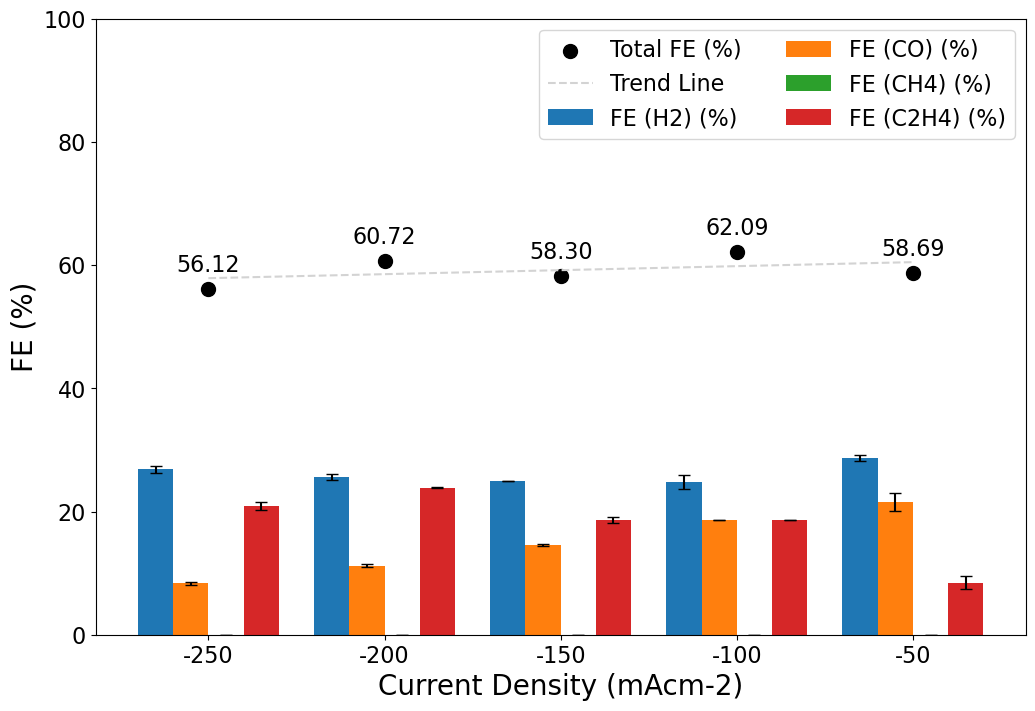

,FE (H2) (%),FE (CO) (%),FE (CH4) (%),FE (C2H4) (%),FE (H2) (%) (SE),FE (CO) (%) (SE),FE (CH4) (%) (SE),FE (C2H4) (%) (SE),Total FE (%)
Current Density (mAcm-2),,,,,,,,,
-250.00,26.860890,8.345348,0.004195,20.910239,0.569483,0.202251,0.000032,0.658730,56.120673
-200.00,25.612759,11.205801,0.005717,23.893637,0.426874,0.253409,0.000025,0.105141,60.717914
-150.00,25.033742,14.573260,0.008074,18.686794,0.000684,0.122964,0.000015,0.486315,58.301869
-100.00,24.741551,18.649921,0.012514,18.681422,1.107655,0.015826,0.000005,0.006959,62.085408
-50.00,28.630924,21.573729,0.025467,8.458090,0.488990,1.488450,0.000303,1.000306,58.688210


In [9]:
#For every current density's value, the following code will plot four columns related to the FEs (%) for the compounds of the final mix.
#Add the error bars calculated from standard deviation. Experimental background: the measurments are repeated twice to monitor the reproducibility and error.

#Extract the unique values of 'Current Density (mAcm-2)'
x = np.unique(pivot_table['Current Density (mAcm-2)'])

#Define the column labels
columns = ['FE (H2) (%)', 'FE (CO) (%)', 'FE (CH4) (%)', 'FE (C2H4) (%)']

#Calculate the mean and standard error for each column
mean_values = pivot_table.groupby('Current Density (mAcm-2)')[columns].apply(lambda x: x[x != 0.0].mean())
std_error_values = pivot_table.groupby('Current Density (mAcm-2)')[columns].apply(lambda x: x[x != 0.0].sem())

#Calculate the total 'FE (%)' for each 'Current Density (mAcm-2)' value
total_values = mean_values.sum(axis=1)

#Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

#Calculate the width for each group of columns
width = 10

#Plot each group of columns
for i, col in enumerate(columns):
    x_pos = x + (i - (len(columns) - 1) / 2) * width
    y = mean_values[col]
    y_err = std_error_values[col]
    #Customize the error bar terminals
    error_kw = {'capsize': 4, 'capthick': 1}  #Modify the capsize and capthick values as desired
    #Plot the bar with error bars
    ax.bar(x_pos, y, width, yerr=y_err, label=col, error_kw=error_kw)

#Plot the total 'FE (%)' as scatter plot markers
ax.scatter(x, total_values, s=100, marker='o', color='black', label='Total FE (%)')  #Adjust marker size and color as desired

#Fit a polynomial regression line to the total 'FE (%)' values, excluding the cases where the FE value is 0
fit_coeffs = np.polyfit(x[total_values != 0.0], total_values[total_values != 0.0], deg=1)
trend_line = np.poly1d(fit_coeffs)
ax.plot(x, trend_line(x), linestyle='--', color='lightgrey', label='Trend Line')

#Set the x and y labels
ax.set_xlabel('Current Density (mAcm-2)', fontsize=20)
ax.set_ylabel('FE (%)', fontsize=20)
ax.tick_params(axis='both', labelsize=16)

#Set the y-axis limits
ax.set_ylim(0, 100)

#Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(x)

#Set the legend position
legend=ax.legend(loc='best', fontsize=16, ncol=2)
#Set the background color of the legend
legend.get_frame().set_facecolor('white')

#Show the grid
#ax.grid(True)

#Add label to the total 'FE (%)' scatter plot
for i, j in zip(x, total_values):
    ax.text(i, j + 2, f'{j:.2f}', ha='center', va='bottom', fontsize=16)

#Concatenate mean_values and std_error_values into a single table, excluding the cases where the FE value is 0
table_data = np.concatenate((mean_values, std_error_values, total_values.to_frame(name='Total FE (%)')), axis=1)
table_data[total_values == 0] = 0  #Set the values as 0 where the FE value is 0
row_labels = [f'{val:.2f}' for val in x]
column_labels = columns + [f'{col} (SE)' for col in columns] + ['Total FE (%)']

#Create a DataFrame from the table data
table_df = pd.DataFrame(table_data, index=row_labels, columns=column_labels)

#Rename the index name to 'Current Density (mAcm-2)'
table_df = table_df.rename_axis('Current Density (mAcm-2)')

#Define the output folder where the initial Excel file will be saved
output_folder = folder_path 
folder_name = os.path.basename(output_folder)

#Set the file paths for the initial output and the additional output
output_excel_path_initial = os.path.join(output_folder, f"{folder_name}_output.xlsx")
output_excel_path_additional = r"C:\Users\GadolS01\OneDrive - Johnson Matthey\CATART\Python Scripts\GC_outputs"

#Example code to save the initial output
with pd.ExcelWriter(output_excel_path_initial, engine='xlsxwriter') as writer:
    # Write the pivot_table DataFrame to Excel
    pivot_table.to_excel(writer, sheet_name='Data Analysis')
    # Create a new worksheet for the plot
    worksheet_plot = writer.book.add_worksheet('Plot')
    # Save the plot as an image
    plt.savefig(os.path.join(output_folder, 'plot.jpeg'), bbox_inches='tight')
    # Insert the plot image into the worksheet
    worksheet_plot.insert_image('B2', os.path.join(output_folder, 'plot.jpeg'))
    # Write the table_df DataFrame to Excel
    table_df.to_excel(writer, sheet_name='FE (%)')

print(f"Initial Excel file saved to: {output_excel_path_initial}")

#Copy the initial Excel file to the additional output folder
shutil.copyfile(output_excel_path_initial, os.path.join(output_excel_path_additional, f"{folder_name}_output.xlsx"))

print(f"Additional Excel file copied to: {os.path.join(output_excel_path_additional, f'{folder_name}_output.xlsx')}")

#Show the plot
plt.show()

#Display the table
table_df


Next steps:
1. Rename the file with the following pattern {folder_name}_output.xlsx
2. Save a copy of the {folder_name}_output.xlsx in a new folder "outputs"
3. Comparison with different output files: (a) FEs sorted data; (b) stacked columns of the selected FEs at fixed current densities and group by catalyst in an interactive way.

In [10]:
output_folder_gc = r'C:\Users\GadolS01\OneDrive - Johnson Matthey\CATART\Python Scripts\GC_outputs'
file_list = glob.glob(os.path.join(output_folder_gc, "*_output.xlsx"))

#Display the available files to the user
print("Available Files:")
for i, file in enumerate(file_list):
    print(f"{i+1}. {os.path.basename(file)}")

Available Files:
1. 230222 ECOF-027-2_CuO Galvanostatic_2nd day_output.xlsx
2. 230418 EF-1-11_Galvanostatic_output.xlsx
3. 230526 ECOF-049_Cu_Sponge_Galvanostatic_output.xlsx
4. 230526 ECOF-050_Spraydried_CuO_Galvanostatic_output.xlsx
5. 230628_ECOF_046_CuO_SiOx_Prciat_Galvanostatic_output.xlsx


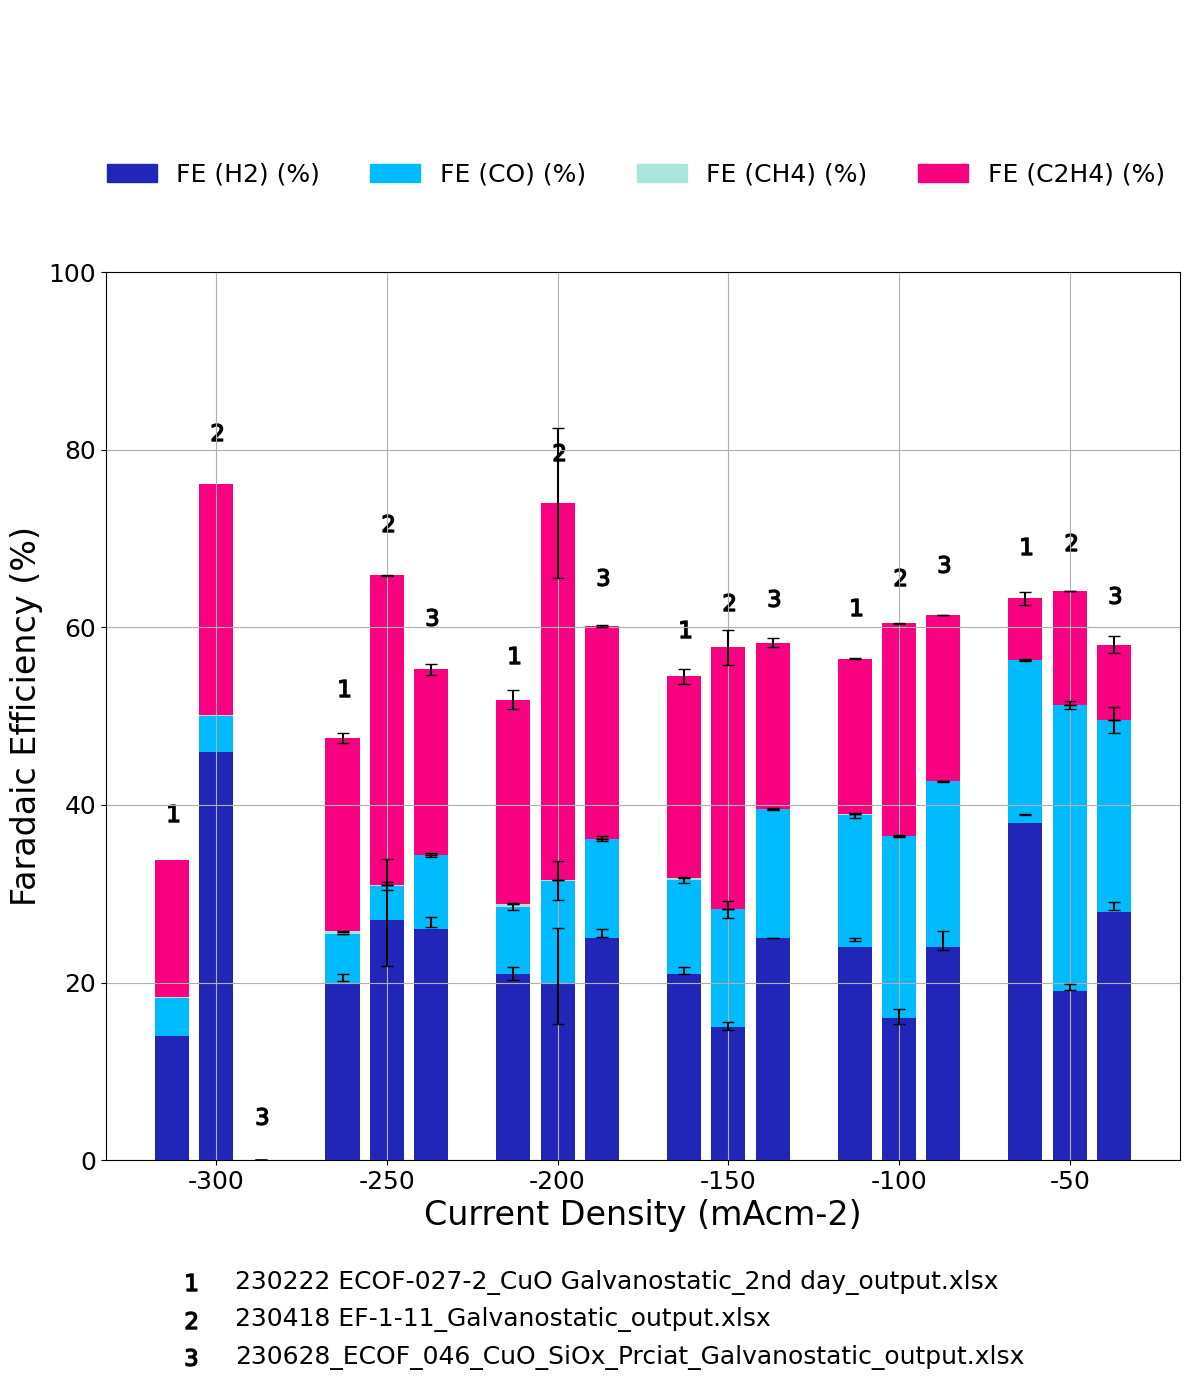

In [11]:
#Ask the user to select the files
selected_files = input("Enter the file numbers (separated by commas) you want to include: ")
selected_files = [int(num.strip()) for num in selected_files.split(",")]

#Filter the file_list based on the user's selection
file_list = [file_list[i-1] for i in selected_files]

Current_Density = [-50, -50, -100, -100, -150, -150, -200, -200, -250, -250, -300, -300]

combined_data = pd.DataFrame()
dfs = []

for file in file_list:
    filename = file
    df = pd.read_excel(filename, sheet_name="FE (%)")
    df = df.set_index("Current Density (mAcm-2)")
    df = df.reindex(Current_Density, fill_value=0)
    df["Filename"] = os.path.basename(filename)
    dfs.append(df)

combined_data = pd.concat(dfs)

#Defining the JM colours
JM_colours = {'dark blue':(30/235,34/235,170/235), 'cyan':(0,172/235,233/235), 'teal':(157/235,211/235,203/235), 'pink':(229/235,0,118/235), 'grey':(87/235,87/235,86/235), 'light grey':(227/235,227/235,227/235), 'purple':(110/235,54/235,140/235), 'magenta':(229/235,0/235,118/235)}

#Define the column labels
columns = ['FE (H2) (%)', 'FE (CO) (%)', 'FE (CH4) (%)', 'FE (C2H4) (%)']

#Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

#Calculate the width for each group of columns
width = 30

#Define the colors for the columns
colors = list(JM_colours.values())[:len(columns)]

#Calculate the total number of files
num_files = len(file_list)

#Calculate the total width for all stacked bars
total_width = width / num_files

#Calculate the offset for centered bars
offset = total_width / 2

#Create a list to store scatter plot handles and labels
scatter_handles = []
scatter_labels = []

#Create a list to store the custom legend patches
legend_patches = []

#Plot each group of columns for each filename
for i, file in enumerate(combined_data['Filename'].unique()):
    #Extract the data for the current filename
    data = combined_data[combined_data['Filename'] == file]
    #Extract the unique values of 'Current Density (mAcm-2)'
    x = np.unique(data.index)
    #Calculate the mean and standard error for each column
    mean_values = data.groupby('Current Density (mAcm-2)')[columns].mean()
    std_error_values = data.groupby('Current Density (mAcm-2)')[columns].sem()
    #Extract the standard error values
    se_columns = [col + ' (SE)' for col in columns]
    se_values = data.groupby('Current Density (mAcm-2)')[se_columns].mean()
    #Calculate the total 'FE (%)' for each 'Current Density (mAcm-2)' value
    total_values = mean_values.sum(axis=1)
    #Calculate the x position for each group of columns
    x_pos = x + (i - (num_files - 1) / 2) * total_width * 1.3
    #Plot each group of columns
    bottom = None
    for j, col in enumerate(columns):
        y = mean_values[col]
        y_err = se_values[col + ' (SE)']
        #Customize the error bar terminals
        error_kw = {'capsize': 4, 'capthick': 1}  #Modify the capsize and capthick values as desired
        if bottom is None:
            bottom = np.zeros_like(x)
        ax.bar(x_pos, y, total_width, yerr=y_err, label=col, bottom=bottom, color=colors[j], error_kw=error_kw)
        bottom += y
    
    #Calculate the x position for the scatter plot markers (center of each group of columns)
    scatter_x_pos = x_pos
    
    #Plot the total 'FE (%)' as scatter plot markers with different colors for each filename
    scatter = ax.scatter(scatter_x_pos, total_values + 5, s=150, marker='${}$'.format(i + 1), color='black', label=file)
    
    #Store the scatter plot handle and label
    scatter_handles.append(scatter)
    scatter_labels.append(file)

    #Append a patch to the legend_patches list for each column
    if i == 0:
        for j, col in enumerate(columns):
            patch = mpatches.Patch(color=colors[j], label=col)
            legend_patches.append(patch)

#Set the x and y labels
ax.set_xlabel('Current Density (mAcm-2)', fontsize=24)
ax.set_ylabel('Faradaic Efficiency (%)', fontsize=24)
ax.tick_params(axis='both', labelsize=18)

#Set the y-axis limits
ax.set_ylim(0, 100)

#Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(x)

#Show the grid
ax.grid(True)

#Create a custom legend for the columns
legend = fig.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(0.7, 0.85), ncol=4, fontsize=18, frameon=False)
#Manually adjust the position of the legends
legend.set_bbox_to_anchor((0.07, 1.25))
#Create a separate legend for the scatter plot
scatter_legend = fig.legend(handles=scatter_handles, labels=scatter_labels, loc='upper center', bbox_to_anchor=(0.5, 0), ncol=1, fontsize=18, frameon=False)
#Set the background color of the legends
legend.get_frame().set_facecolor('white')
scatter_legend.get_frame().set_facecolor('white')



#Show the plot
plt.tight_layout()
plt.show()

In [13]:
# Prompt the user to save the data and plot
save_choice = input("Do you want to save the data and plot to an Excel file? (y/n): ")

if save_choice.lower() == 'y':
    # Output folder path
    output_folder = r'C:\Users\GadolS01\OneDrive - Johnson Matthey\CATART\Python Scripts\GC_outputs'

    # Create the output file name
    current_datetime = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    output_filename = f"Comparison_{current_datetime}.xlsx"
    output_path = os.path.join(output_folder, output_filename)

    # Save the plot as an image file
    output_plotname = f"Comparison_{current_datetime}.png"
    plot_image_path = os.path.join(output_folder, output_plotname)
    fig.savefig(plot_image_path, dpi=300)

    # Save the data and plot to an Excel file
    with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
        # Save the combined data to a worksheet
        combined_data.to_excel(writer, sheet_name="Combined Data", index=True)

        # Create a worksheet for the plot
        workbook = writer.book
        plot_sheet = workbook.add_worksheet("Plot")

        # Specify the full path of the plot image
        plot_image_path = os.path.join(output_folder, output_plotname)

        # Insert the plot image into the worksheet
        plot_sheet.insert_image('B2', plot_image_path)

        # Set the chart title and axes labels
        chart_title = 'Faradaic Efficiency Comparison'
        x_axis_label = 'Current Density (mAcm-2)'
        y_axis_label = 'Faradaic Efficiency (%)'

        # Add the chart title
        plot_sheet.write('B1', chart_title)

        # Add the x-axis label
        plot_sheet.write('B20', x_axis_label)

        # Add the y-axis label
        plot_sheet.write('A12', y_axis_label)

    print("Data and plot saved successfully to an Excel file.")
else:
    print("Data and plot not saved.")

Data and plot saved successfully to an Excel file.
